# Round 18: Japanese Grand Prix


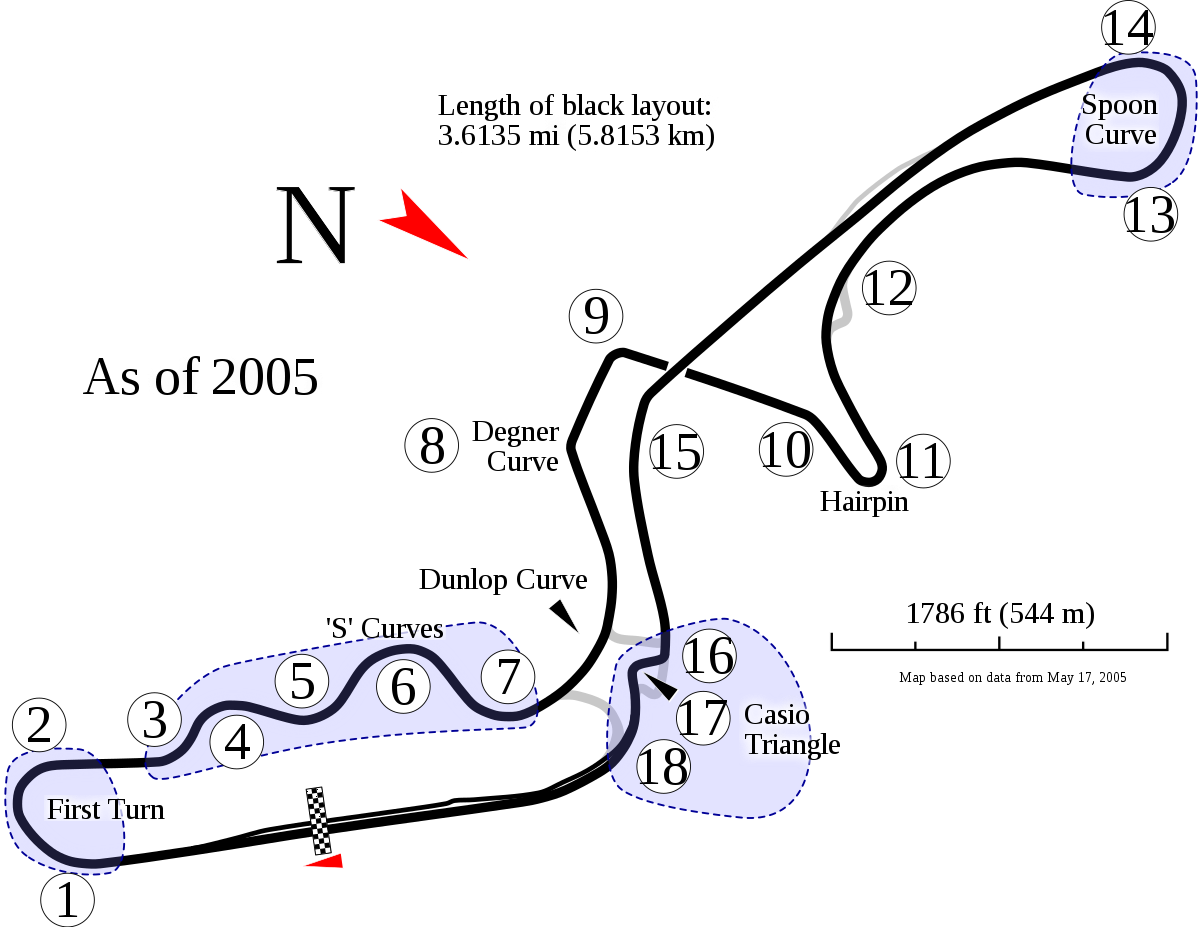

In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

import matplotlib as mpl
from matplotlib.collections import LineCollection
from matplotlib import cm
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np

import seaborn as sns

In [2]:
plotting.setup_mpl()
ff1.Cache.enable_cache('cache')

In [3]:
quali = ff1.get_session(2022, 18, 'Q')

In [4]:
laps_quali = quali.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Japanese Grand Prix - Qualifying [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['22', '20', '24', '44', '3', '16', '11', '6', '55', '10', '14', '63', '47', '1', '4', '18', '31', '23', '5', '77']


In [20]:
def compare_racelaps(data, title, analysed_drivers):
    fig, ax = plt.subplots(figsize=(10,5))
    visualized_team = []

    for driver in analysed_drivers:
        df = data.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]

        team = df['Team'].unique()[0]

        linestyle = '-' if team not in visualized_team else ':'

        x = df['LapNumber']
        y = df['LapTimeSeconds']

        ax.plot(x, y, label=driver, color=plotting.team_color(team), linestyle=linestyle)
        ax.set_title(title)
        ax.set_xlabel('Lap')
        ax.set_ylabel('Lap Time (s)')
        legend_opts = dict(bbox_to_anchor=(1.02, 0, 0.2, 1),
                           loc="upper right",
                           ncol=1,
                           shadow=True,
                           edgecolor="black",
                           mode="expand",
                           borderaxespad=0.)
        ax.legend(**legend_opts)

        visualized_team.append(team)

## Qualifying
---

In quali, Max took pole over Charles by 0.010s and over Carlos by 0.057s. It was very close and it is said to be the 4th closest gap on qualifying (ever?).

#### How Max beats Charles
---

In [6]:
ver = laps_quali.pick_driver('VER').pick_fastest()
lec = laps_quali.pick_driver('LEC').pick_fastest()

In [7]:
telemetry_ver = ver.get_car_data().add_distance()
telemetry_lec = lec.get_car_data().add_distance()

In [8]:
# Getting the delta time
delta_time, ref_tel, compare_tel = utils.delta_time(ver, lec)

[Text(0, 0.5, '<-- VER AHEAD | LEC AHEAD -->')]

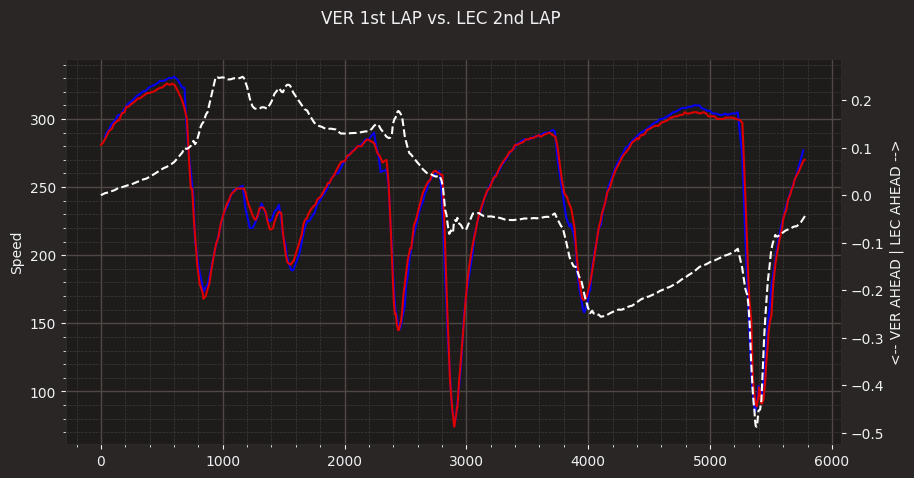

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("VER 1st LAP vs. LEC 2nd LAP")

ax.plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='VER', color=plotting.team_color(ver['Team']))
ax.plot(telemetry_lec['Distance'], telemetry_lec['Speed'], label='LEC', color=plotting.team_color(lec['Team']))
ax.set(ylabel='Speed')

twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color='white')
twin.set(ylabel='<-- VER AHEAD | LEC AHEAD -->')

To give some context, *Max's fastest lap was on his first run* whilst *Leclerc's fastest was on his second*. Max could not improve on his second due to mistake (+0.028s on 2nd run) which ultimately is irrelevant as Leclerc couldn't beat Max's first lap.

As we could see from the telemetry above, 
- Max's top speed is higher than Charles'
- Charles was actually faster 0.2s+ over Max at some point. But half of the lap is where his advantage started to shrink.
- Charles time loss starts around Degner Two (T9). He lost a spike on hairpin (T11). And lost a spike more on Spoon Curve entry (T13).
- On spoon curve exit (T14) and through 130R (T15) he gained back some time albeit *perhaps* gave the time back on Casio Triangle entry (T16). He later commented that the grip are already gone by that point.

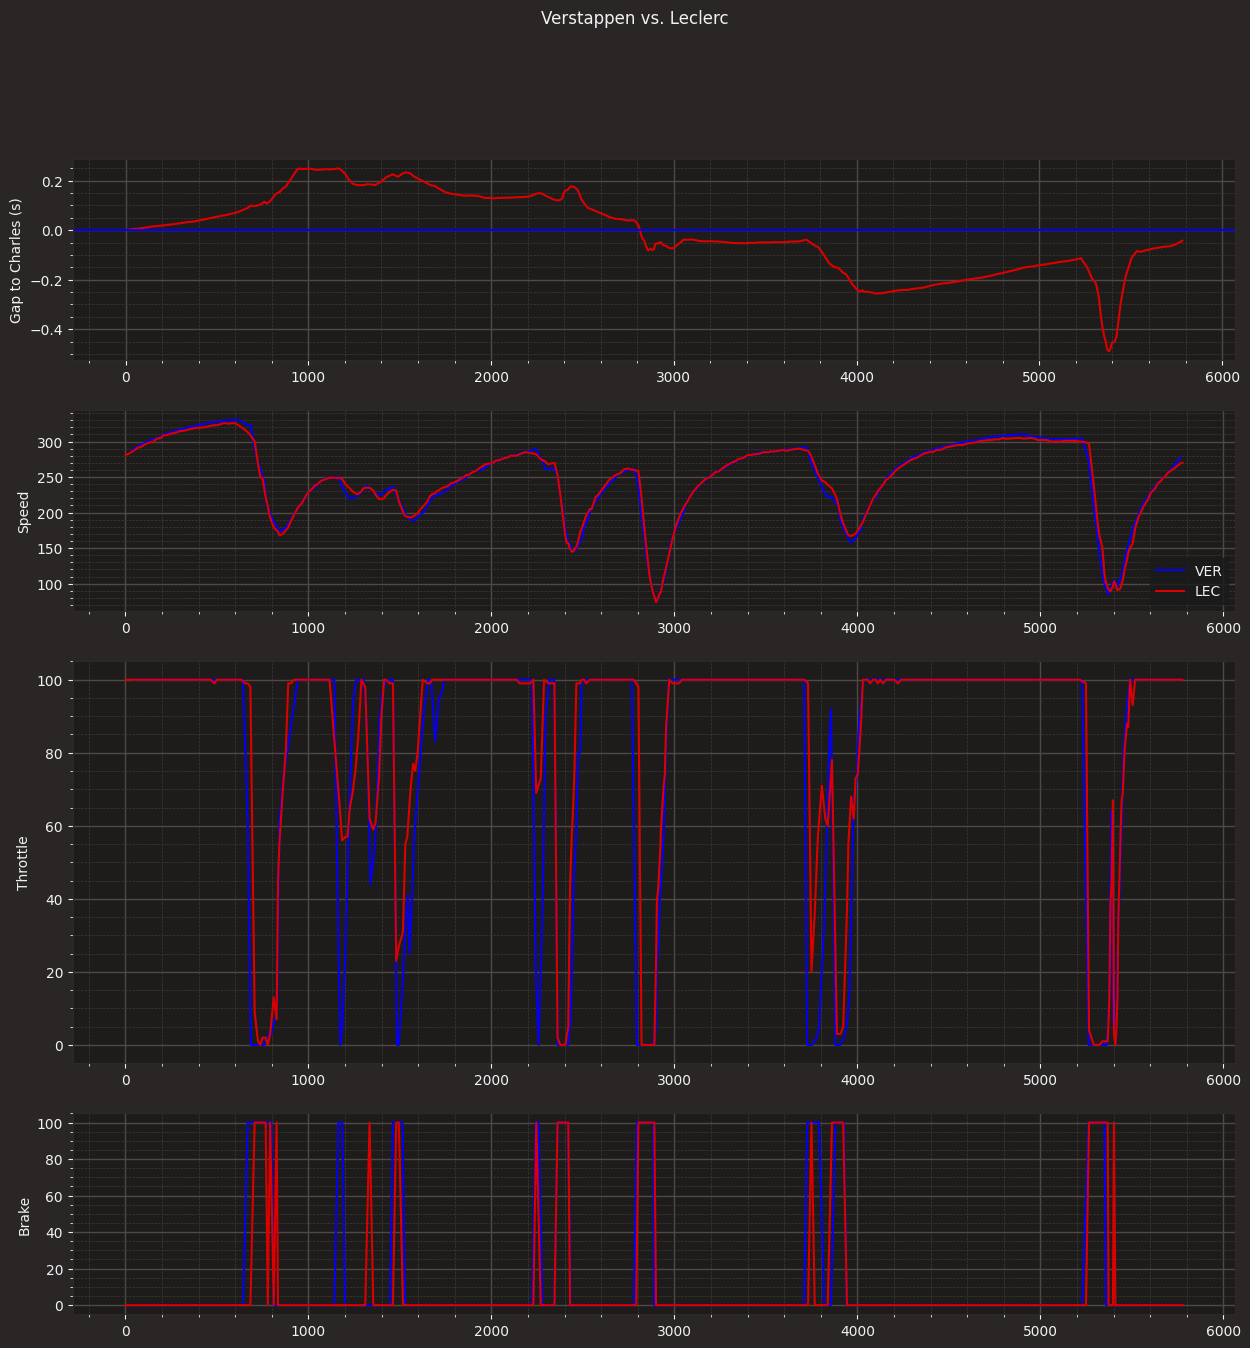

In [12]:
plot_size = [15, 15]
plot_ratios = [1, 1, 2, 1]

plt.rcParams['figure.figsize'] = plot_size

fig, ax = plt.subplots(4, gridspec_kw={'height_ratios': plot_ratios})
fig.suptitle("Verstappen vs. Leclerc")

ax[0].plot(ref_tel['Distance'], delta_time, color=plotting.team_color(lec['Team']))
ax[0].axhline(0, color=plotting.team_color(ver['Team']))
ax[0].set(ylabel=f"Gap to Charles (s)")

ax[1].plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='VER', color=plotting.team_color(ver['Team']))
ax[1].plot(telemetry_lec['Distance'], telemetry_lec['Speed'], label='LEC', color=plotting.team_color(lec['Team']))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

ax[2].plot(telemetry_ver['Distance'], telemetry_ver['Throttle'], label='VER', color=plotting.team_color(ver['Team']))
ax[2].plot(telemetry_lec['Distance'], telemetry_lec['Throttle'], label='LEC', color=plotting.team_color(lec['Team']))
ax[2].set(ylabel='Throttle')

ax[3].plot(telemetry_ver['Distance'], telemetry_ver['Brake'], label='VER', color=plotting.team_color(ver['Team']))
ax[3].plot(telemetry_lec['Distance'], telemetry_lec['Brake'], label='LEC', color=plotting.team_color(lec['Team']))
ax[3].set(ylabel='Brake')

plt.show()

From this telemetry, we supposedly able to infer each car's strength. However honestly, it's not as simple as I initially thought it would be!

Throughout Sector 1 (0 to 2100), Charles have higher throttle (in other words, lifted the gas less) relative to Max. However looking at the speed, Ferrari aren't that much faster through corners. Indeed, Max's top speed on the straights granted him some advantage and he did have the fastest Sector 1 of anybody.

In [14]:
tel_ver_s1 = telemetry_ver.loc[telemetry_ver['Distance'] <= 2100]
tel_lec_s1 = telemetry_lec.loc[telemetry_lec['Distance'] <= 2100]

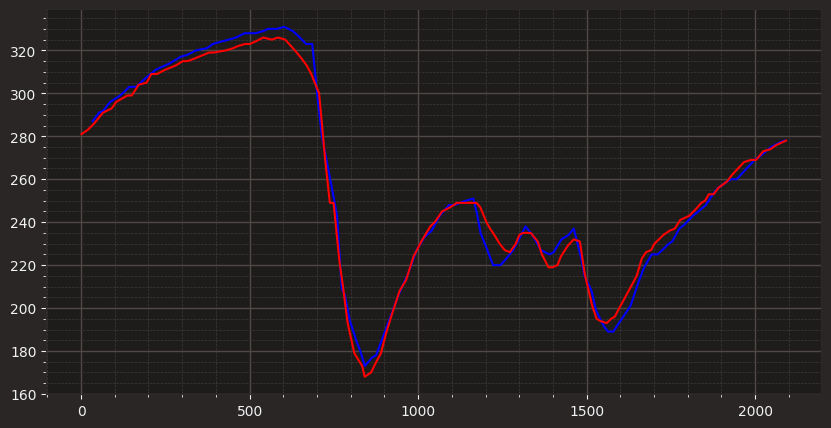

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(tel_ver_s1['Distance'], tel_ver_s1['Speed'], color='Blue')
ax.plot(tel_lec_s1['Distance'], tel_lec_s1['Speed'], color='Red')

## Race
---

The race was ran on wet conditions. It initially had standing start but after a chain of incidents on lap 1, the race had to be suspended.

Fortunately, the race was restarted with around 45 minutes left on clock. A couple of laps behind safety car and then there we went, racing again.

Ultimately, the race was dominated by Max Verstappen. After pitting to inters from a very slow wet, he was untouchable even by his closest challenger Charles Leclerc.

#### Who was Fastest at the wet Suzuka?
---

In [5]:
race = ff1.get_session(2022, 'Suzuka', 'R')
laps_race = race.load_laps()

core           INFO 	Loading laps for Japanese Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['1', '16', '55', '11', '31', '44', '14', '63', '5', '4', '3', '77', '22', '24', '47', '23', '10', '20', '18', '6']


In [6]:
laps_race['LapTimeSeconds'] = laps_race['LapTime'].dt.total_seconds()

In [37]:
# Getting rid of outliers (in case of SC or VSC)
# This block was NOT run
# q75, q25 = laps_race['LapTimeSeconds'].quantile(0.75), laps_race['LapTimeSeconds'].quantile(0.25)

# intr_qr = q75 - q25

# laptime_max = q75 + (1.5 * intr_qr) # IQR Proximity
#laptime_min = q25 - (1.5 * intr_qr)

#laps_race.loc[laps_race['LapTimeSeconds'] < laptime_min, 'LapTimeSeconds'] = np.nan
#laps_race.loc[laps_race['LapTimeSeconds'] > laptime_max, 'LapTimeSeconds'] = np.nan

In [7]:
# Getting rid of In/Out Laps
laps_race = laps_race[(laps_race['PitOutTime'].isnull() & laps_race['PitInTime'].isnull())]

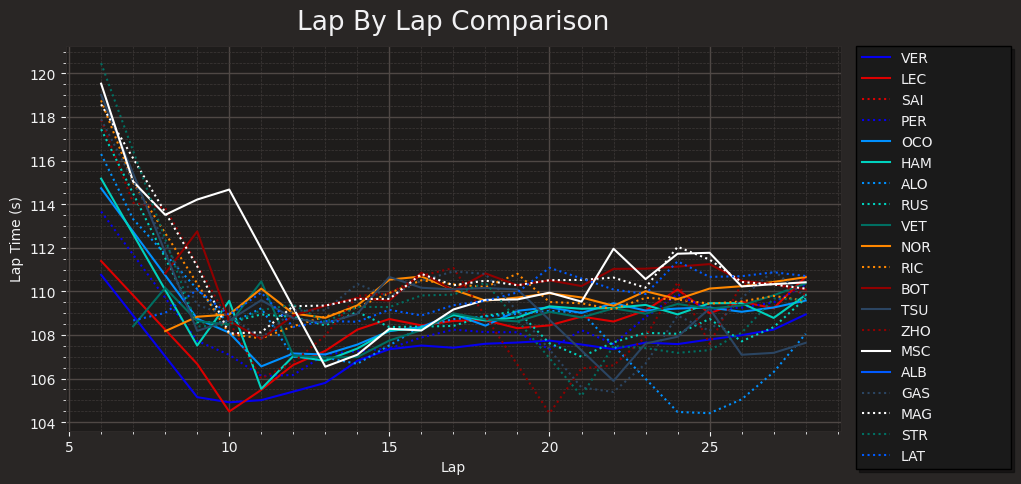

In [21]:
analysed_drivers = ['VER', 'LEC', 'SAI', 'PER', 'OCO', 'HAM', 'ALO', 'RUS', 'VET',
       'NOR', 'RIC', 'BOT', 'TSU', 'ZHO', 'MSC', 'ALB', 'GAS', 'MAG',
       'STR', 'LAT']
compare_racelaps(laps_race, "Lap By Lap Comparison", analysed_drivers)

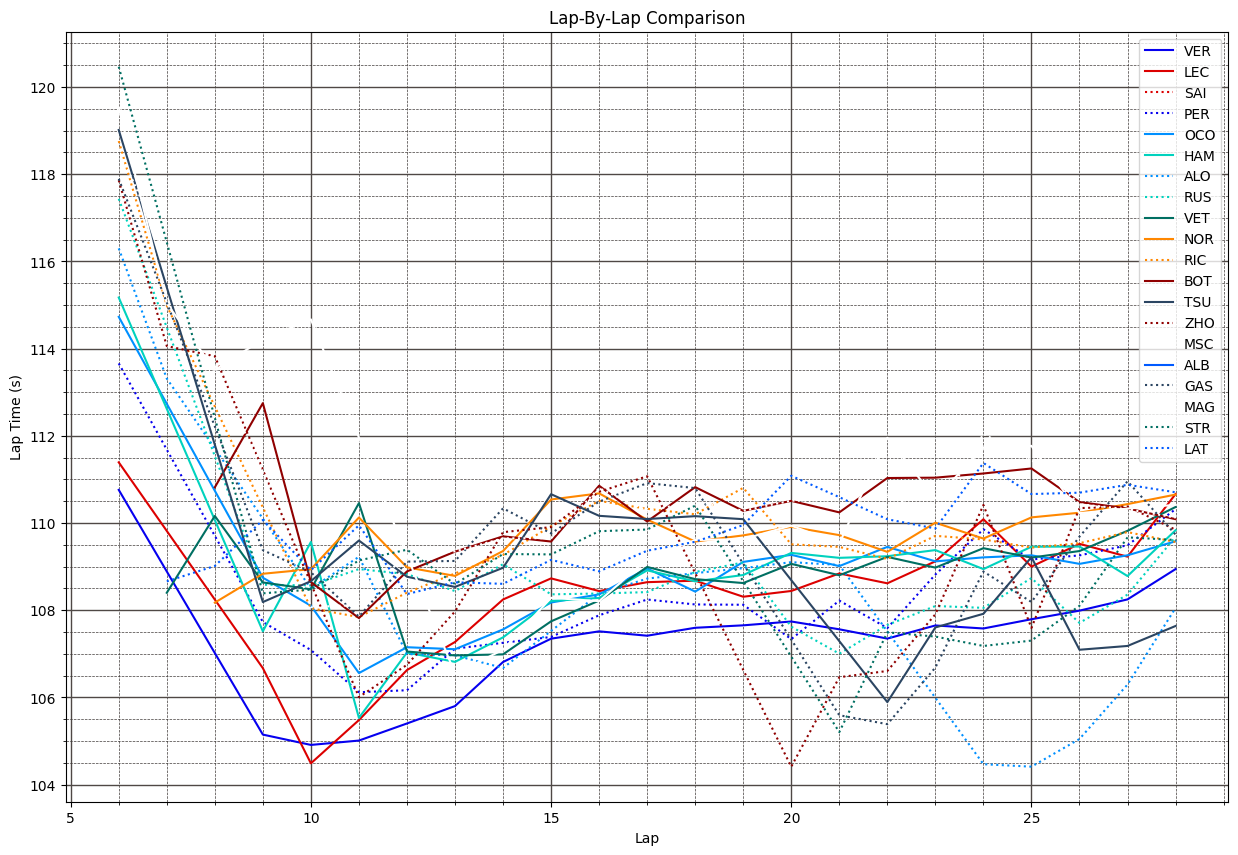

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
plt.rcParams['figure.figsize'] = [10, 10]

visualized_team = []


for driver in analysed_drivers:
    df = laps_race.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    team = df['Team'].unique()[0]
    
    linestyle = '-' if team not in visualized_team else ':'
    
    x = df['LapNumber']
    y = df['LapTimeSeconds']
    
    ax.plot(x, y, label=driver, color=plotting.team_color(team), linestyle=linestyle)
    ax.set_title('Lap-By-Lap Comparison')
    ax.set_xlabel('Lap')
    ax.set_ylabel('Lap Time (s)')
    ax.legend()
    
    visualized_team.append(team)

Figure above is the Lap Time comparison of all drivers after the restart (Lap 6).

You might notice some driver hitting their nadir pretty late. That is because they've pitted for another set of inters. The interesting part is the high degratdation, notice how quick their laptime cliffed up again?

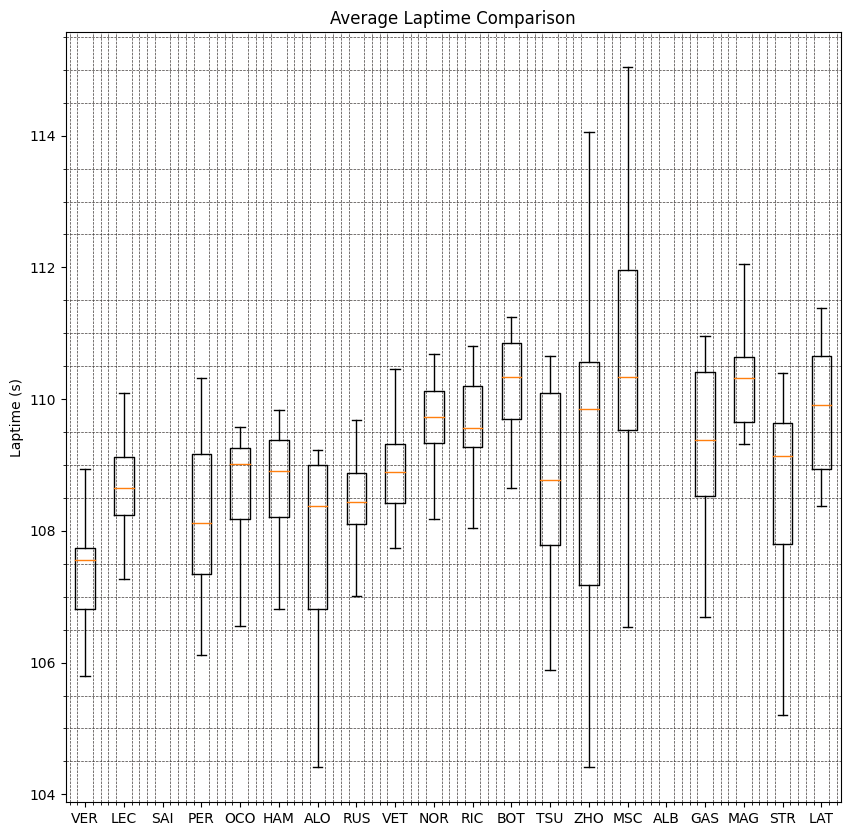

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
plt.style.use('default')

laptimes = [laps_race.pick_driver(x)['LapTimeSeconds'].dropna() for x in analysed_drivers]

ax.boxplot(laptimes, labels = analysed_drivers, showfliers=False)
ax.set_title('Average Laptime Comparison')
ax.set(ylabel = 'Laptime (s)')
ax.grid(False)

I swear, I'd sort the boxplot later!

Jokes aside, Max shown incredible average pace throughout the race. More than one second faster than the whole field.

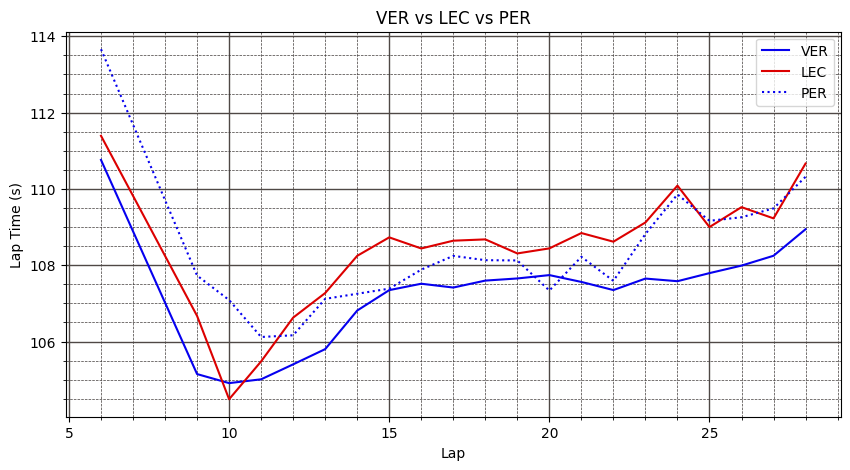

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
analysed_drivers = ['VER', 'LEC', 'PER']

visualized_team2 = []

for driver in analysed_drivers:
    df = laps_race.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    team = df['Team'].unique()[0]
    
    linestyle = '-' if team not in visualized_team2 else ':'
    
    x = df['LapNumber']
    y = df['LapTimeSeconds']
    
    ax.plot(x, y, label=driver, color=plotting.team_color(team), linestyle=linestyle)
    ax.set_title('VER vs LEC vs PER')
    ax.set_xlabel('Lap')
    ax.set_ylabel('Lap Time (s)')
    ax.legend()
    
    visualized_team2.append(team)

Figure above is comparison between Max, Charles, and Checo.

Point of interests:
- Max was very quick immediately. He maintain his pace very well on the latter stages.
- It's quite incredible how Charles was able to stay rather close with Max on the beginning phase, especially considering the blinding sprays. Brave man. Compare that Checo, he seemed to slow down and gap himself from the car infront.
- Both Red Bull is much kinder on its tires. Ferrari hits steep cliff after setting fastest lap (Lap 10, about 4 laps after restart). This is why Checo was able to reel onto Charles' pretty quickly.
- Checo wasn't actually doing that bad relative to Max going into half distance. He was indeed much more careful on the beginning stages, but so were everybody else. Visiblity was pretty low when you are behind multiple cars. 
- However, we have to factor that Checo has to push because he is catching Charles, meanwhile Max could just manage his pace according Charles'. Max probably could go much faster.
- At the later stage, Checo was held up by Charles (Lap ~23). That's why his pace was suddenly much slower.

#### The P6 Battle: VET vs. ALO vs. RUS
---

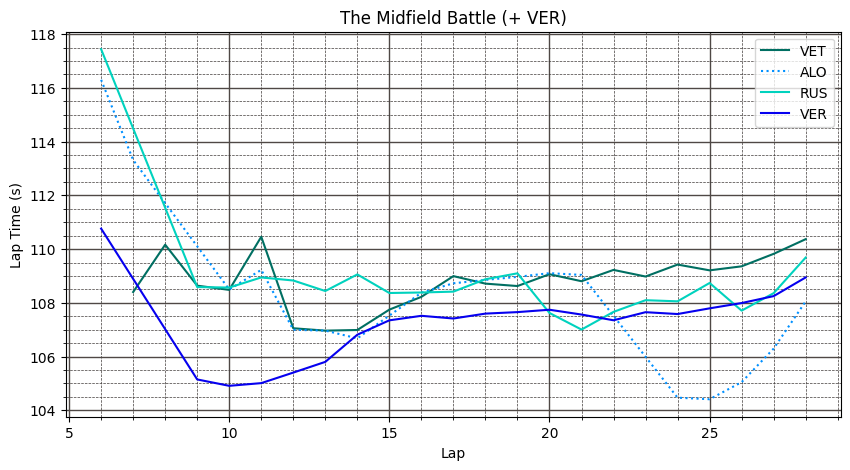

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
analysed_drivers = ['VET', 'ALO', 'RUS', 'VER']

visualized_team3 = ['Alpine F1 Team']

for driver in analysed_drivers:
    df = laps_race.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    team = df['Team'].unique()[0]
    
    linestyle = '-' if team not in visualized_team3 else ':'
    
    x = df['LapNumber']
    y = df['LapTimeSeconds']
    
    ax.plot(x, y, label=driver, color=plotting.team_color(team), linestyle=linestyle)
    ax.set_title('The Midfield Battle (+ VER)')
    ax.set_xlabel('Lap')
    ax.set_ylabel('Lap Time (s)')
    ax.legend()
    
    visualized_team3.append(team)

The dotted line is Fernando Alonso. We compare him with drivers around him: Sebastian Vettel (who was infront of him ) and George Russell (who was catching him). We also adds the race winner Max Verstappen as a good benchmark of their pace.

Remember that Fernando pitted on lap 22. So lap 22 and 23 was effectively not on the data since it is an inlap and outlap. You should start paying attention to his lap 24 instead.

Point of interests:
- Fernando was matching Sebastian's pace until lap 20s. That's because he was held up by slower Sebastian. They've fought for the position pretty much the whole race.
- That said, pay attention that Sebastian was actually much quicker than his RUS and ALO on the beginning stages. If you look at closely, his line (data) wasn't on the graph until lap 6. That's because Sebastian pitted for inters two laps earlier than anybody. It was a gamble that worked. Not only he had clear vison, he was much faster than anybody in front of him. Successful undercut.
- On pit (Lap 6), RUS lost some time due to double stack and dropped few positions. He has to overatake few cars until he was finally in clear air (Lap 19). The interesting part, is lap 21 onwards. RUS twice was faster than VER, and other than that was matching VER's lap. We should compare this to Ferrari.
- After Alonso had pitted, his pace was crazy, almost 4 seconds/lap faster even than the race leader.

Let's get a closer look.

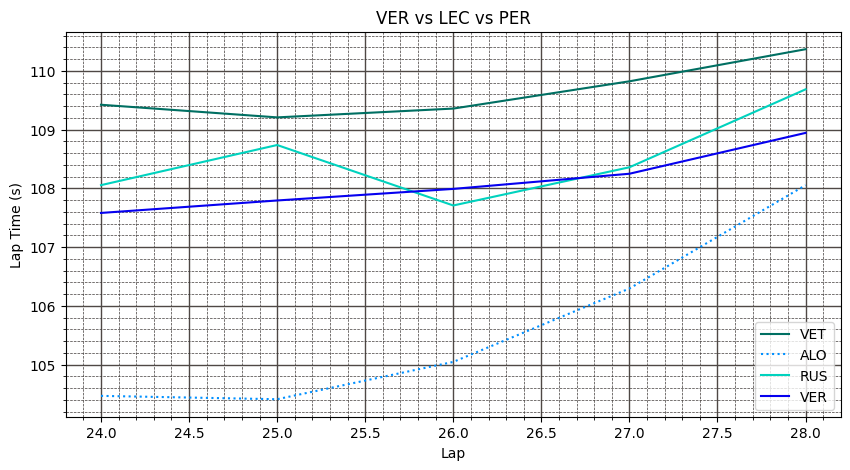

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
analysed_drivers = ['VET', 'ALO', 'RUS', 'VER']

visualized_team3 = ['Alpine F1 Team']

for driver in analysed_drivers:
    df = laps_race.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    df = df.loc[df["LapNumber"] >= 24]
    
    team = df['Team'].unique()[0]
    
    linestyle = '-' if team not in visualized_team3 else ':'
    
    x = df['LapNumber']
    y = df['LapTimeSeconds']
    
    ax.plot(x, y, label=driver, color=plotting.team_color(team), linestyle=linestyle)
    ax.set_title('VER vs LEC vs PER')
    ax.set_xlabel('Lap')
    ax.set_ylabel('Lap Time (s)')
    ax.legend()
    
    visualized_team3.append(team)

### To be continued.

TODO:
- [ ] Add line collections aka circuit map. Plot according to fastest minisectors.
- [ ] Find a way to mark the sectors. (What's the distance?)
- [ ] Sort the boxplot
- [ ] Make a 'mean relative to the fastest' barplot
- [ ] Better looking plots
- [X] How fast was two stopper Fernando?
- [ ] Analyze the start: why was Max' launch so slow?
- [ ] Make a gap visualizations for the race

#### Some terminology, in case you are confused:
1. Beginning stages: Lap 1 into around half of the race.
2. Latter stages: Around half of the race into final lap.
3. Sprays: Just imagine accelerating cars through a huge puddle of water, but at 320kph. It's blinding.
4. Much kinder on its tire: F1 tires were designed to degrade each lap, in simple terms, your lap time slower by each lap. In the terminology context, the tire degredation was longer for particular car.
5. Race Pace: Your speed on race. Likewise, quali pace is your speed on quali.
6. T... : Turn. For example, T14 is Turn 14. See track map.